# EMMA Analysis
This notebook analyzes the statistical characteristics of the EMMA labels collected in 2023

In [1]:
import pandas as pd
from conf import DATA_DIR
import matplotlib.pyplot as plt

from sklearn import mixture
import numpy as np
import scipy.stats as stats

In [2]:
emma_final = pd.read_csv(DATA_DIR + 'EMMA_total_wide.csv')

ratings are not adjusted to each other (yet). subgenres are not included (yet).  previous and new data are measured with different versions of the GEMS: new data have generally higher intesities due to the measurement and NOT due to actually more intense emotions. When analyzing the ratings all together we need to find a way of adjust the ratings of both "versions" of the EMMA and I'd like to know which procedure you would suggest or prefer.

- "know" and "like" indicate familiarity and liking, repsectively. 
- "gems-version" indicates which version was used to collect the ratings (GEMS-45 the previous data, GEMS-9 the new data)
- interclass correlation (ICC) based on dimensions and second order factors, respectively 
- number of ratings (english, german, total) 
 - means of the GEMS emotions (9 dimensions) and three second order factors (sublimity, vitality, unease)

New songs were annotated using GEMS-9

In [3]:
emma_new_final = emma_final[emma_final.gems_version == 'gems-9']

Old songs were annotated using GEMS-45

In [4]:
emma_old_final = emma_final[emma_final.gems_version == 'gems-45']

 - enrich tag annotations by using synonyms (instead of 45, use ~200 to index user-generated tags) => and rerun experiments thereafter
 - instead of average felt intensities of EMMA items, use frequency of selection (how many participants selected each of the 45 dimensions) => making the data conceptually similar to the LFM tags
 - IDF weighting of LFM tags (give more weight to less frequently occurring EMMA items over all songs) => may alleviate the problem that Last.fm tags are free-form and some emotion tags just may not come as easy to mind as others; first to check: Does frequency distribution of EMMA items+synonyms follow Zipf's law.
 - binarize values?

# Example of the old data collection
> Music excerpts were rated with the GEMS. It contains 45 labels that can be grouped
into nine different dimensions (Wonder, Transcendence, Tenderness, Nostalgia, Peacefulness,
Energy, Joyful Activation, Sadness, and Tension) and three higher order factors (Sublimity,
Vitality, and Unease). In the old study, emotion terms were rated on a scale of 0 to 100,
with non-selected items being automatically set to 0 (see Fehler! Verweisquelle konnte
nicht gefunden werden. subsection). From these ratings, the mean intensities for the nine
GEMS dimensions were computed for each music excerpt by using Equation 1 51. Unlike the
case of an arithmetic mean value, the value resulting from the formula account for both the
number of chosen emotion terms and their intensity

The old data were selected on 47 GEMS terms.
Question for Innsbruck: why are there 47 instead of 45 gems labels? and how to map them to the 9 GEMS dimensions?

In [5]:
gems_9 = ['wond', 'tran', 'tend', 'nost', 'peac', 'joya', 'ener', 'sadn', 'tens']

We need to map the `Gs_i` to the 9 GEMS.

The tracks selected are `alternate_selection_repeating_artists_listeners`, recrawled.

In [6]:
emma_to_compare = emma_new_final.copy()
emma_to_compare = emma_to_compare[['song_code'] + gems_9 + ['title', 'artist', 'genre']]

# Normalize to 1
row_sums = emma_new_final[gems_9].sum(axis=1)
emma_to_compare[gems_9] = emma_new_final[gems_9] / row_sums[:, np.newaxis]

emma_to_compare.to_csv(DATA_DIR + 'emma_to_compare.csv', index=False)

/tmp/ipykernel_6388/2675853844.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  emma_to_compare[gems_9] = emma_new_final[gems_9] / row_sums[:, np.newaxis]


In [7]:
np.histogram(emma_to_compare[gems_9])

(array([ 860, 1285,  997,  550,  253,   92,   22,    9,    8,    1]),
 array([0.        , 0.05213461, 0.10426921, 0.15640382, 0.20853842,
        0.26067303, 0.31280763, 0.36494224, 0.41707685, 0.46921145,
        0.52134606]))

In [8]:
# TODO threshold for gems binarization

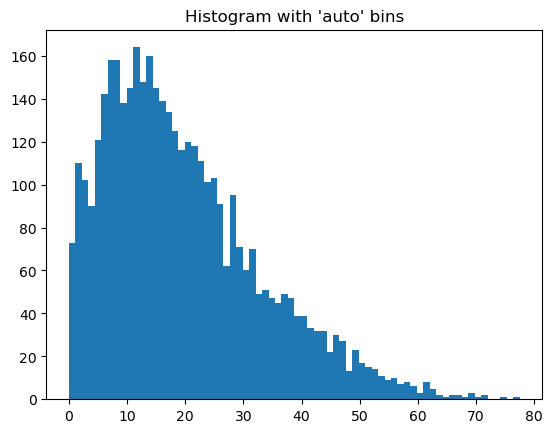

In [9]:
_ = plt.hist(emma_new_final[gems_9].to_numpy().flatten(), bins=70)  # arguments are passed to np.histogram

plt.title("Histogram with 'auto' bins")

plt.show()

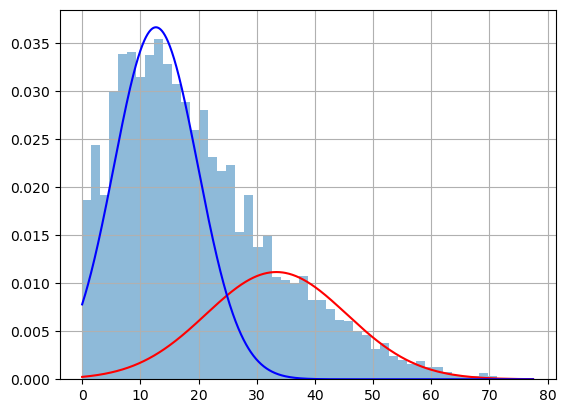

In [10]:
f = emma_new_final[gems_9].to_numpy().flatten().reshape(-1, 1)

g = mixture.GaussianMixture(n_components=2, covariance_type='full')
g.fit(f)
weights = g.weights_
means = g.means_
covars = g.covariances_

plt.hist(f, bins=50, histtype='bar', density=True, alpha=0.5)

f_axis = f.copy().ravel()
f_axis.sort()
plt.plot(f_axis, weights[0] * stats.norm.pdf(f_axis, means[0], np.sqrt(covars[0])).ravel(), c='red')
plt.plot(f_axis, weights[1] * stats.norm.pdf(f_axis, means[1], np.sqrt(covars[1])).ravel(), c='blue')

plt.rcParams['agg.path.chunksize'] = 10000

plt.grid()
plt.show()

In [11]:
means

array([[33.3803274 ],
       [12.68030521]])

In [12]:
# binarize by
# setting the same sparsity as in the tags

In [13]:
emma_to_compare[gems_9]

,wond,tran,tend,nost,peac,joya,ener,sadn,tens
364,0.093820,0.096054,0.049144,0.096054,0.034996,0.247952,0.242368,0.016381,0.123232
365,0.147436,0.102285,0.014771,0.048495,0.084727,0.296823,0.205686,0.007804,0.091973
366,0.084564,0.117450,0.099329,0.152685,0.105034,0.089597,0.174497,0.075839,0.101007
367,0.119247,0.069561,0.177301,0.119770,0.227510,0.016213,0.046025,0.150105,0.074268
368,0.101489,0.091158,0.050441,0.075053,0.058949,0.267396,0.226983,0.011547,0.116986
...,...,...,...,...,...,...,...,...,...
812,0.115575,0.073311,0.232977,0.193582,0.242369,0.074354,0.017480,0.045134,0.005218
813,0.072068,0.045629,0.134755,0.173561,0.165885,0.166738,0.097655,0.056716,0.086994
814,0.097911,0.059928,0.121334,0.158894,0.116269,0.108251,0.142224,0.109939,0.085250
815,0.117114,0.099763,0.115142,0.129338,0.183754,0.154180,0.123423,0.044953,0.032334


In [14]:
# this value is such that the sparsity of the binarized EMMA corresponds to the sparsity 
# of the binarized tags. Notice that it also roughly corresponds to the separation of the two gaussians in the GMM.
threshold = np.percentile(f, 65.14594064262939)
threshold

22.600148888286434

In [15]:
emma_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
364,04q3VppIQEET5rzy,0.093820,0.096054,0.049144,0.096054,0.034996,0.247952,0.242368,0.016381,0.123232,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
365,07xF9Q0K1t3ist7K,0.147436,0.102285,0.014771,0.048495,0.084727,0.296823,0.205686,0.007804,0.091973,Ponta de lança africano (Umbabarauma),Jorge Ben,nova
366,08QtcDK0rtDFogFP,0.084564,0.117450,0.099329,0.152685,0.105034,0.089597,0.174497,0.075839,0.101007,Heaven,Lamb,downtempo
367,0aXjQyzzLGf1xxdI,0.119247,0.069561,0.177301,0.119770,0.227510,0.016213,0.046025,0.150105,0.074268,Cais,Milton Nascimento,nova
368,0d32mc0rFIgiPh0B,0.101489,0.091158,0.050441,0.075053,0.058949,0.267396,0.226983,0.011547,0.116986,Please Stay (7th District Radio Mix),Kylie Minogue,europop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsDz17XVFUFYh4y7,0.115575,0.073311,0.232977,0.193582,0.242369,0.074354,0.017480,0.045134,0.005218,A Love That Will Last,Renee Olstead,jazz
813,ZSnDQ7mhvjJLx9IG,0.072068,0.045629,0.134755,0.173561,0.165885,0.166738,0.097655,0.056716,0.086994,Canto De Ossanha,Elis Regina,nova
814,zTyH0fZwZ8ytmKuF,0.097911,0.059928,0.121334,0.158894,0.116269,0.108251,0.142224,0.109939,0.085250,I Never Loved a Man (the Way I Love You),Aretha Franklin,soul
815,ZVjUg4rlqeq2zk7C,0.117114,0.099763,0.115142,0.129338,0.183754,0.154180,0.123423,0.044953,0.032334,Gasoline,Alpine,pop


In [16]:
emma_bin_to_compare = emma_to_compare.copy()
emma_bin_to_compare[gems_9] = (emma_new_final[gems_9] > (threshold)) * 1.

In [17]:
(emma_bin_to_compare[gems_9] == 0.).sum().sum()

2656

In [18]:
emma_bin_to_compare.to_csv(DATA_DIR + 'emma_bin_to_compare.csv', index=False)

In [19]:
(emma_bin_to_compare[gems_9] == 1.).sum().sum()

1421

In [20]:
emma_bin_to_compare

,song_code,wond,tran,tend,nost,peac,joya,ener,sadn,tens,title,artist,genre
364,04q3VppIQEET5rzy,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Synaesthesia (Fly Away) - Radio Edit,The Thrillseekers,trance
365,07xF9Q0K1t3ist7K,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Ponta de lança africano (Umbabarauma),Jorge Ben,nova
366,08QtcDK0rtDFogFP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Heaven,Lamb,downtempo
367,0aXjQyzzLGf1xxdI,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Cais,Milton Nascimento,nova
368,0d32mc0rFIgiPh0B,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Please Stay (7th District Radio Mix),Kylie Minogue,europop
...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,zsDz17XVFUFYh4y7,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,A Love That Will Last,Renee Olstead,jazz
813,ZSnDQ7mhvjJLx9IG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Canto De Ossanha,Elis Regina,nova
814,zTyH0fZwZ8ytmKuF,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,I Never Loved a Man (the Way I Love You),Aretha Franklin,soul
815,ZVjUg4rlqeq2zk7C,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,Gasoline,Alpine,pop


In [21]:
f = emma_bin_to_compare[gems_9]
f.sum() / len(f)

wond    0.298013
tran    0.183223
tend    0.364238
nost    0.538631
peac    0.408389
joya    0.587196
ener    0.459161
sadn    0.136865
tens    0.161148
dtype: float64

In [22]:
f.sum().sum() / (len(f) * 9)

0.34854059357370615